# Python Project - Prosper Loan Project
## by Jemima Joannis

## Introduction
> The Prosper Loan dataset contains information about loans facilitated through a peer-to-peer lending platform. It encompasses a variety of borrower attributes, loan details, and outcome metrics. This analysis aims to investigate key factors influencing loan defaults and provide insights that can determine which variables contribute most to loan repayment success or failure with a focus on the these metrics:
- Investigating the relationship between borrower characteristics (e.g., credit score, income) and loan performance metrics (e.g., default rates, on-time payments).
- Compare the performance of loans across different loan statuses (e.g., completed, charged off) to identify patterns and trends.
- Analyze the impact of loan terms (e.g., APR, loan amount) on loan outcomes and investor returns.

>  This comprehensive dataset offers a rich source of insights into the dynamics of lending operations, borrower characteristics, and loan performance.


## Dataset Source:
> The dataset was gotten from a data analyst bootcamp I took part in, as one of the projects of the course. It includes data that encompasses 113937 loan applications.

## Objective:
> This dataset is analyzed to understand the factors influencing loan repayment performance and to develop predictive models that can accurately assess the likelihood of successful loan repayment. Identifying patterns and trends within the data will allow us to improve the institution's decision-making process for approving loan applications and managing credit risk effectively.





## Preliminary Wrangling

In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Prosper Loan.csv')

In [4]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.shape

(113937, 81)

> This dataset is a 113937x81 dataset

> The main features of this dataset are that it contains
    
    Borrower characteristics such as:
        CreditScoreRangeLower
        CreditScoreRangeUpper
        StatedMonthlyIncome
        EmploymentStatus
        IsBorrowerHomeowner

    Loan Information:
        LoanOriginalAmount
        Term
        BorrowerRate
        ProsperRating (Alpha)

    Loan Performance:
        LoanStatus

> The features in the dataset that I will be working with to help support my investigation are: ListingKey, ListingCreationDate, Occupation, EmploymentStatus, Term, BorrowerRate, StatedMonthlyIncome, CreditScoreRangeUpper, IsBorrowerHomeowner, ListingCategory (numeric), LoanOriginalAmount, LoanOriginationDate, LoanStatus, ProsperRating (Alpha), DelinquenciesLast7Years


Since this is a loan performance analysis, the focus will mostly be on the relationship between the delinquencies and the other columns.

In [7]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### Cleaning Data
> Here i'm going to be using the drop function to delete columns i won't be needing for my analysis and that are not useful.

In [17]:
df.drop(columns=['CreditGrade', 'ListingKey','ListingCreationDate', 'DateCreditPulled', 'TotalProsperLoans','LoanOriginationQuarter', 'FirstRecordedCreditLine','ListingNumber','ClosedDate','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','GroupKey','TotalProsperPaymentsBilled','TotalProsperPaymentsBilled','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments'],inplace=True)

## Data Type Conversion
 Now I'm going to convert the LoanOriginationDate column type from object data type to datetime format

In [18]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%d/%m/%Y %H:%M')

## Filling of empty cells
I will be using the mean function for the numerical columns and mode function to fill in the empty columns in the categorical columns

In [19]:
numeric_cols = ['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
                'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
                'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 
                'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 
                'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 
                'AvailableBankcardCredit', 'TotalTrades', 'TradesOpenedLast6Months', 
                'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio']

# Filling numeric columns with their mean
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = ['ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus']

# Filling categorical columns with their mode
for col in categorical_cols:
    mode_val = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_val)

In [20]:
df

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,C,...,19141,9425,2007-09-12,1F3E3376408759268057EDA,330.43,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,A,...,134815,10000,2014-03-03,1D13370546739025387B2F4,318.93,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,C,...,6466,3001,2007-01-17,5F7033715035555618FA612,123.32,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,A,...,77296,10000,2012-11-01,9ADE356069835475068C6D2,321.45,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,D,...,102670,15000,2013-09-20,36CE356043264555721F06C,563.97,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,C,...,88485,10000,2013-04-22,2EC435768441332602FDC15,364.74,1.0,0,0,0.0,1
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,A,...,55801,2000,2011-11-07,55C4336679182766893E4FC,65.57,1.0,0,0,0.0,22
113934,60,Current,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,D,...,123122,10000,2013-12-23,0FE0370029359765342FDB5,273.35,1.0,0,0,0.0,119
113935,60,Completed,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,C,...,56401,15000,2011-11-21,A33834861822272782621C8,449.55,1.0,0,0,0.0,274


For outliers, I used interquartile range (IQR) method to check and remove outliers from the numerical column, because its is the appropriate measure of variability to use when a distribution is skewed. The median is used instead of the mean to show a central tendency.

In [21]:
from scipy.stats.mstats import winsorize

numeric_cols = ['BorrowerAPR','BankcardUtilization',  'ProsperRating (numeric)', 'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'MonthlyLoanPayment','IncomeRange','LoanOriginalAmount','Term'] 

for col in numeric_cols:
    df[col] = winsorize(df[col].values, limits=[0.05, 0.05])

## Null Values
I used the isnull function to check for any column that had any null value in it and found none.

In [22]:
df.isnull().sum()

Term                                  0
LoanStatus                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
OpenRevolvingAccounts                 0
OpenRevolvingMonthlyPayment           0


## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up.

### Question
How many borrowers are homeowners?

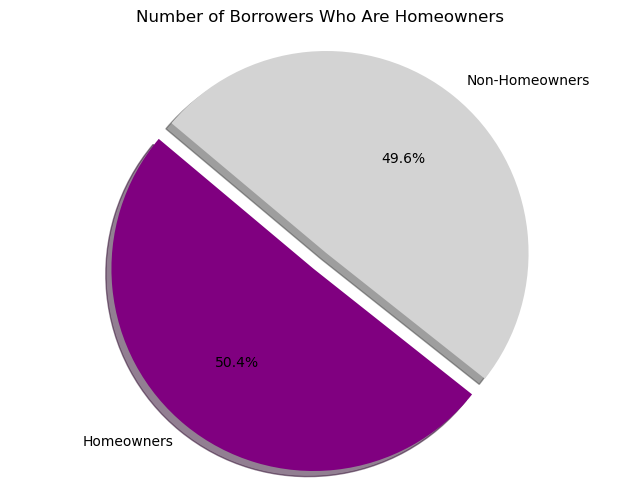

In [23]:
# Calculate the number of homeowners and non-homeowners
number_of_homeowners = (df['IsBorrowerHomeowner'] == True).sum()
number_of_non_homeowners = (df['IsBorrowerHomeowner'] == False).sum()

# Labels, sizes, and other plot settings
labels = ['Homeowners', 'Non-Homeowners']
sizes = [number_of_homeowners, number_of_non_homeowners]
colors = ['purple', 'lightgrey']
explode = (0.1, 0)  # To highlight the first slice

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of Borrowers Who Are Homeowners')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This shows that the percentage of Homeowners is greater than that of non-homeownwers

What is the distribution of borrower APRs in the dataset?

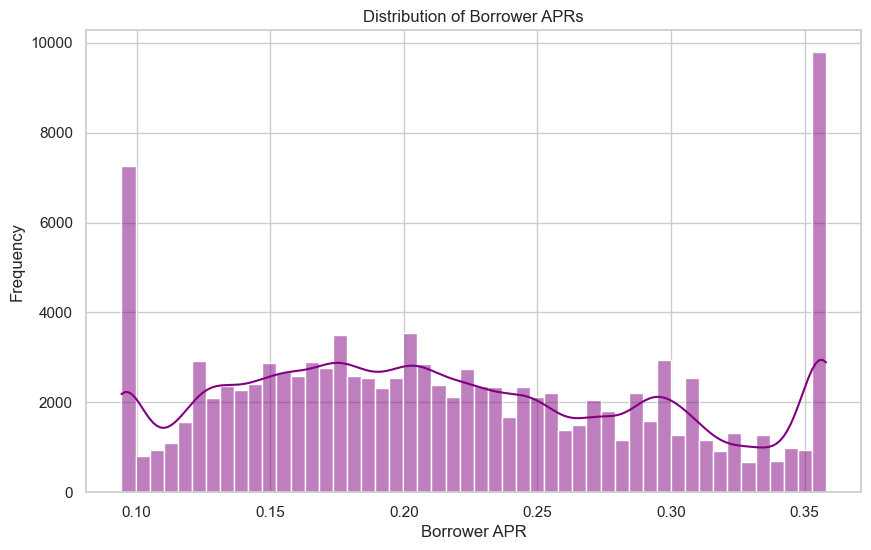

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['BorrowerAPR'], bins=50, kde=True, color='purple')

plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower APRs')
plt.show()

The distribution of Borrower APRs in the dataset is right-skewed, with most values concentrated at lower APRs, but a few borrowers have significantly higher rates.

What is the most common employment status among borrowers?

Most Common Employment Status Among Borrowers: Employed


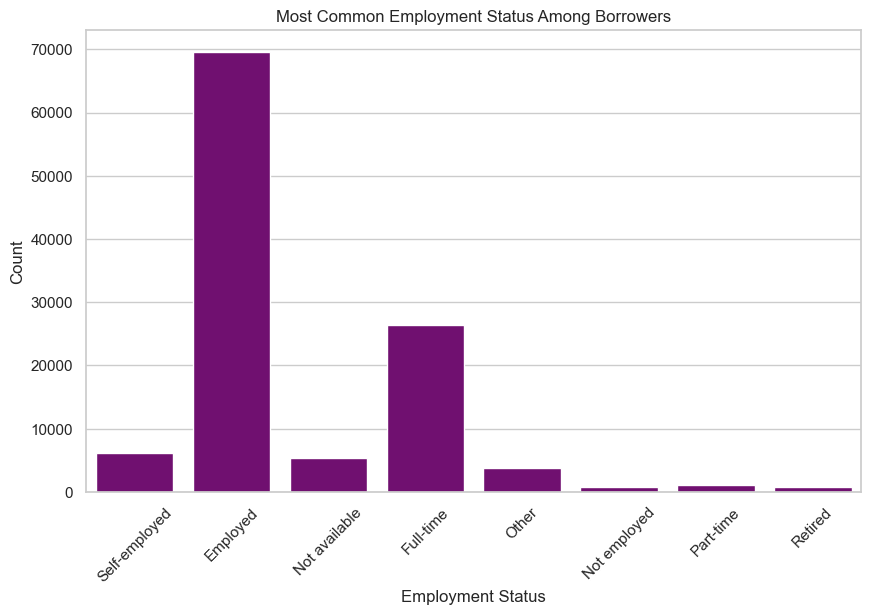

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EmploymentStatus', color='Purple')
plt.title('Most Common Employment Status Among Borrowers')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
most_common_employment_status = df['EmploymentStatus'].mode()[0]
print(f'Most Common Employment Status Among Borrowers: {most_common_employment_status}')

Most Common Employment Status Among Borrowers: Employed


What is the average monthly loan payment in the dataset?

Average Monthly Loan Payment: $265.10


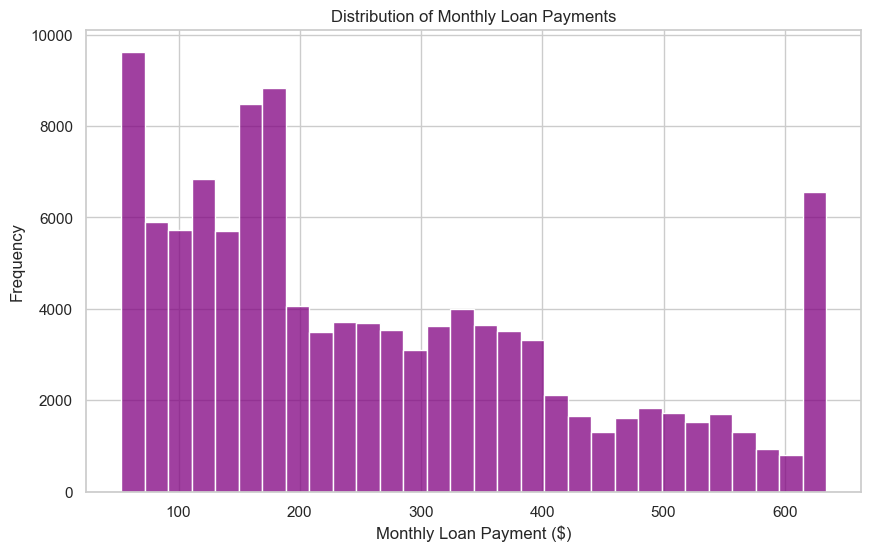

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyLoanPayment', bins=30, color='purple')
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Frequency')
average_monthly_payment = df['MonthlyLoanPayment'].mean()
print(f'Average Monthly Loan Payment: ${average_monthly_payment:.2f}')

The Average Monthly Loan Payment is $265.10

How many loans in the dataset have been defaulted on?

Number of Defaulted Loans: 5018


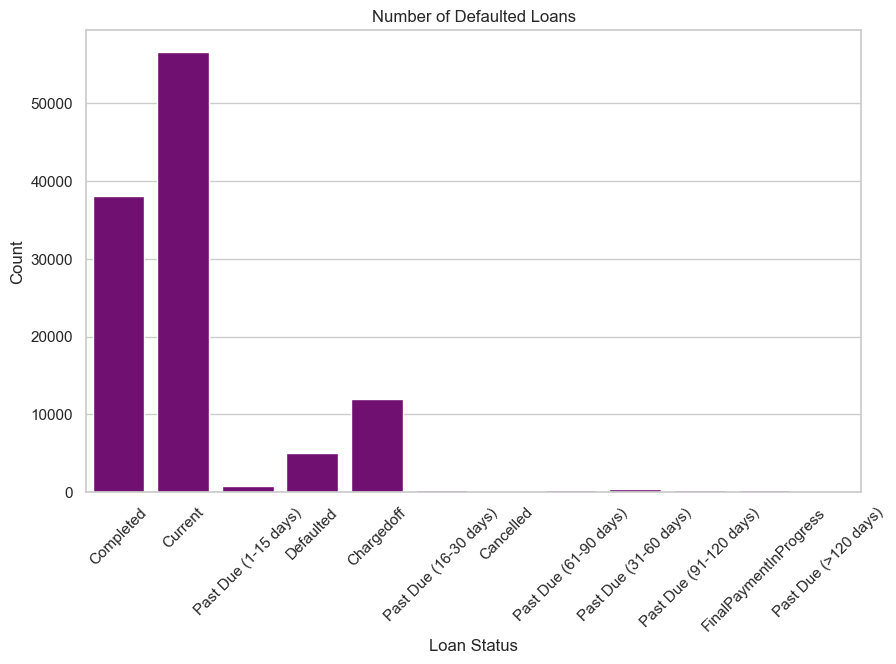

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LoanStatus', color='purple')
plt.title('Number of Defaulted Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
defaulted_loans = (df['LoanStatus'] == 'Defaulted').sum()
print(f'Number of Defaulted Loans: {defaulted_loans}')

The number of Defaulted Loans are 5018

Does income influence loan amount?

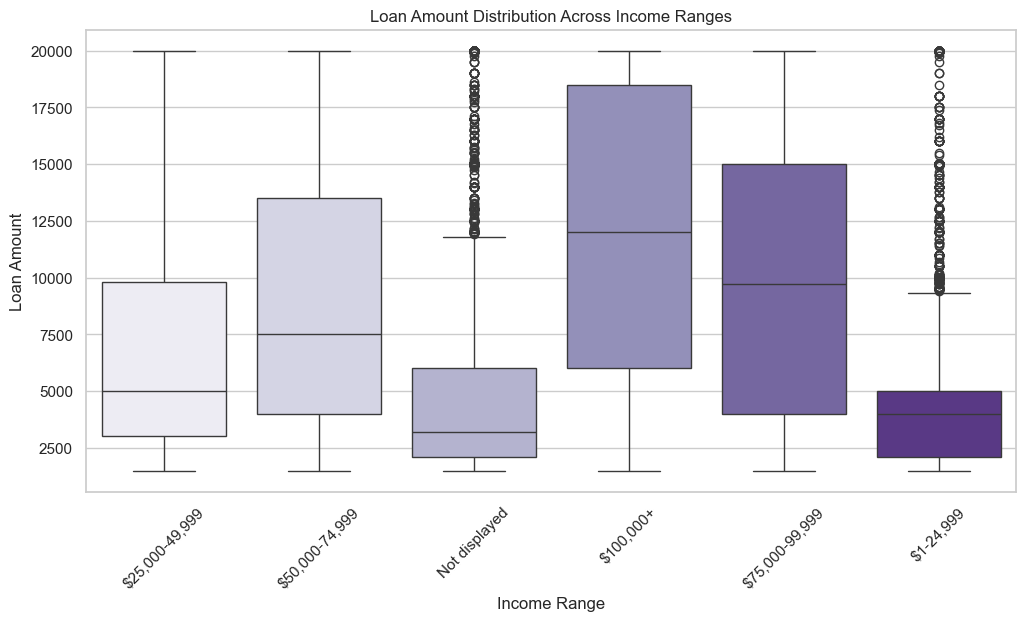

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Using boxplot to visualize the distribution of Loan Amount across Income Ranges
sns.boxplot(data=df, x='IncomeRange', y='LoanOriginalAmount', hue='IncomeRange', palette='Purples', legend=False)

plt.title('Loan Amount Distribution Across Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

Different income range affects or influences the loan amount. The higher the income, the higher the loan amount

### Observations
BorrowerAPR: This variable represents the annual percentage rate (APR) charged to borrowers.

LoanStatus: This categorical variable indicates the status of the loan (e.g., current, completed, defaulte).d

CreditScoreRangeUpper and CreditScoreRangeLower: These variables represent the upper and lower bounds of the borrower's credit scorete.
.

LoanOriginationDate: This variable indicates the date when the loan oarigined.

ProsperRating (numeric): This variable represents the numeric rating assigned to the borrowrer by Psper.

ProsperScore: This variable represents the numeric score indicating the credit risk of the borrower.

I had to convert the LoanOriginationDate column to Datetime data type.

### Operations to adjust the data

I deleted some columns that were not needed, cause they were either completely empty or totally useless,I had to convert the LoanOriginationDate column to Datetime data type,and used a code to convert some outliers rather than delete it entirely. i went through this process so my analysis could come out clear and can be understood or give me a wrong report.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data.

Is there a relationship between the borrower's ProsperScore and their ProsperRating?

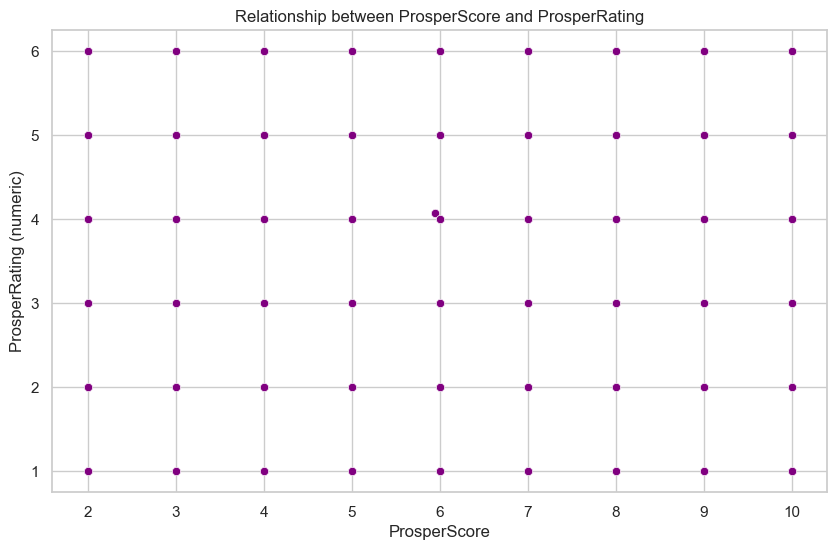

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ProsperScore', y='ProsperRating (numeric)', color='purple')
plt.title("Relationship between ProsperScore and ProsperRating")
plt.xlabel("ProsperScore")
plt.ylabel("ProsperRating (numeric)");

There was a strong positive correlation observed between ProsperRating and ProsperScore. Borrowers with higher Prosper ratings tended to have higher Prosper scores, indicating consistency in the assessment of borrower creditworthiness by Prosper.

Does the borrower's employment status affect their loan status?

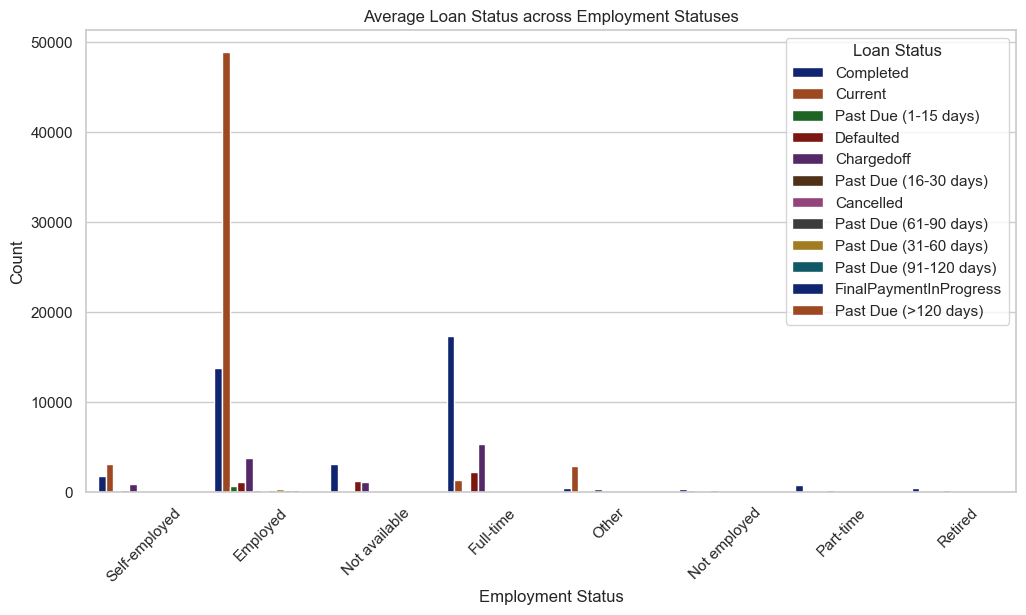

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EmploymentStatus', hue='LoanStatus', palette='dark')
plt.title("Average Loan Status across Employment Statuses")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Loan Status');

The distribution of loan statuses varied across different employment statuses. For instance, employed borrowers were more likely to have current or completed loans, while unemployed borrowers were more likely to have defaulted loans. This indicates a potential relationship between employment status and loan status.

Does the borrower's homeowner status affect their loan status?

Chi-square Statistic: 601.4775902100894
P-value: 6.765843987783233e-122


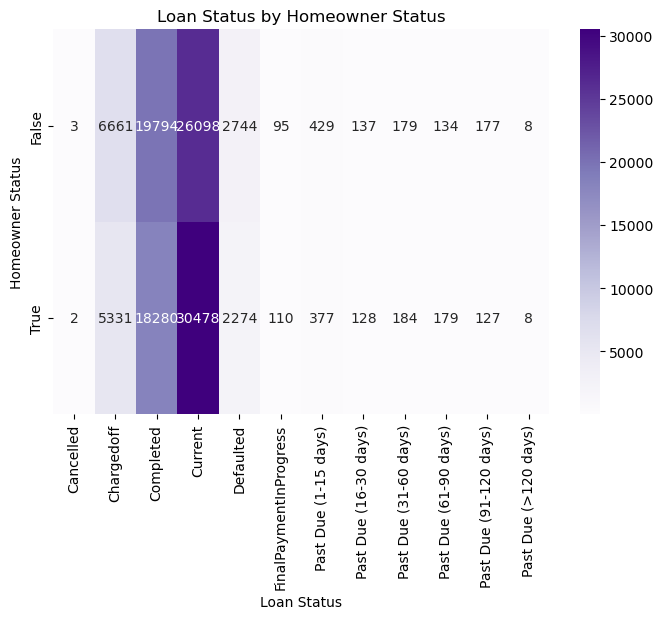

In [5]:
from scipy.stats import chi2_contingency

# Create a contingency table
home_loan_ct = pd.crosstab(df['IsBorrowerHomeowner'], df['LoanStatus'])

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(home_loan_ct)

# Print results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.heatmap(home_loan_ct, annot=True, cmap='Purples', fmt='d')
plt.title('Loan Status by Homeowner Status')
plt.xlabel('Loan Status')
plt.ylabel('Homeowner Status')
plt.show()

The Chi-square test result shows:

Chi-square statistic = 601.48 (higher values suggest a stronger relationship)
P-value = 6.77e-122 (which is essentially 0.000... very close to zero).
Since the p-value is far below 0.05, we reject the null hypothesis, meaning there is a statistically significant relationship between homeowner status and loan status.
This suggests that whether a borrower is a homeowner or not has an impact on their loan status.

Is there a relationship between BorrowerAPR and LoanStatus?

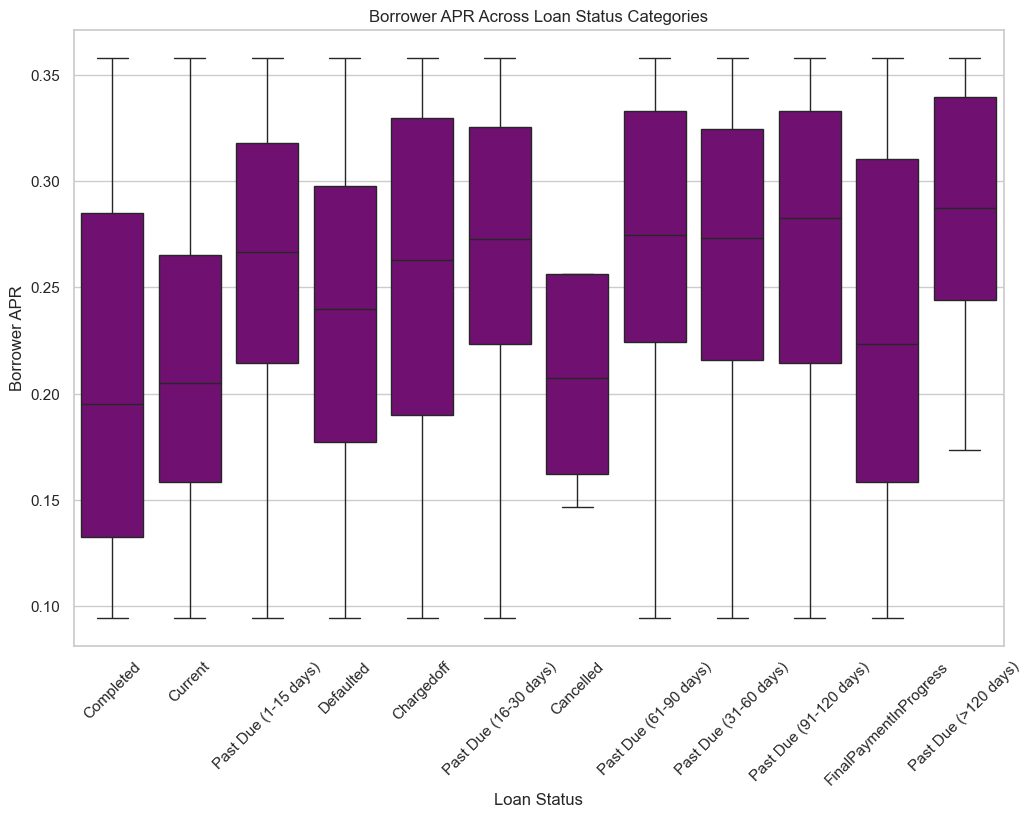

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='LoanStatus', y='BorrowerAPR',color='purple')
plt.title('Borrower APR Across Loan Status Categories')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=45);

There was a noticeable variation in borrower APR across different loan statuses. For example, defaulted loans tended to have higher APRs compared to current or completed loans. This suggests that loan status may influence the APR charged to borrowers.

Does the loan term impact the borrower's credit utilization?

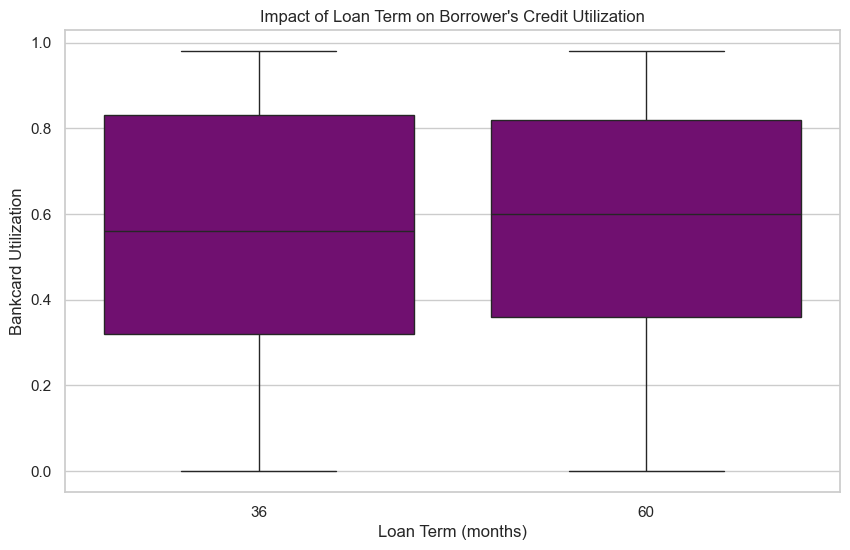

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Term', y='BankcardUtilization',color='purple')
plt.title("Impact of Loan Term on Borrower's Credit Utilization")
plt.xlabel("Loan Term (months)")
plt.ylabel("Bankcard Utilization");

This shows that the lower the loan term, the higher the Bankcard utilization, albeit only slightly higher.

Is there a connection between the borrower's income range and the loan amount they requested?

                  count          mean          std     min     25%      50%  \
IncomeRange                                                                   
$1-24,999        7895.0   4514.812666  3444.015309  1500.0  2100.0   4000.0   
$100,000+       17337.0  11947.340486  6176.907559  1500.0  6000.0  12000.0   
$25,000-49,999  32192.0   6173.762985  3931.425091  1500.0  3000.0   5000.0   
$50,000-74,999  31050.0   8626.899130  5276.645075  1500.0  4000.0   7500.0   
$75,000-99,999  16916.0  10007.198510  5907.415164  1500.0  4000.0   9700.0   
Not displayed    8547.0   5087.546040  4402.703743  1500.0  2106.5   3200.0   

                    75%      max  
IncomeRange                       
$1-24,999        5000.0  20000.0  
$100,000+       18500.0  20000.0  
$25,000-49,999   9800.0  20000.0  
$50,000-74,999  13500.0  20000.0  
$75,000-99,999  15000.0  20000.0  
Not displayed    6001.0  20000.0  


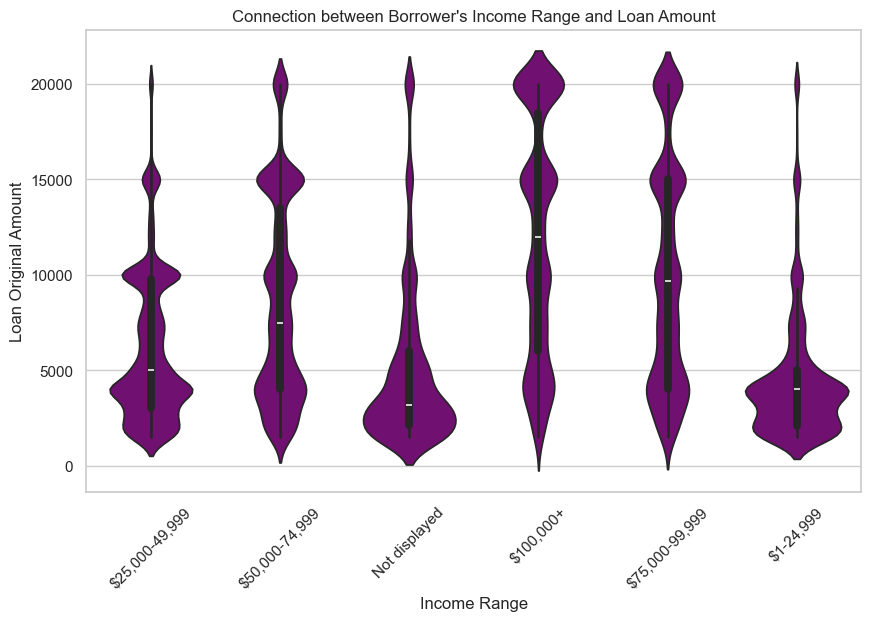

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='IncomeRange', y='LoanOriginalAmount',color='purple')
plt.title("Connection between Borrower's Income Range and Loan Amount")
plt.xlabel("Income Range")
plt.ylabel("Loan Original Amount")
plt.xticks(rotation=45)
summary_stats=df.groupby('IncomeRange')['LoanOriginalAmount'].describe()
print(summary_stats)

Borrowers in higher income ranges tended to request larger loan amounts compared to those in lower income ranges. This suggests that income level may influence the loan amount requested by borrowers.

### Observations
Several interesting relationships were observed between features that were not the main focus of the investigation:

EmploymentStatus vs. LoanOriginalAmount: Employed borrowers tended to request larger loan amounts compared to other employment statuses. This suggests that employment status may influence borrowing behavior and the amount of credit requested by borrowers.

IncomeRange vs. BorrowerAPR: Borrowers in higher income ranges tended to have lower APRs compared to those in lower income ranges. This indicates that income level may be associated with the interest rates charged to borrowers.swer here!

## Conclusions
After thoroughly exploring the dataset, several key findings and insights have emerged:

Borrower Characteristics and Loan Outcomes: Employment status, income range, and credit rating are significant factors influencing loan outcomes such as APR, loan amount, and loan status. Employed borrowers with higher incomes and better credit ratings tend to have lower APRs and request larger loan amounts.

Loan Status and Risk Factors: Defaulted loans typically have higher APRs and are associated with certain borrower characteristics such as lower credit scores and employment status. This suggests that lenders may adjust interest rates based on perceived borrower risk.

Impact of Loan Term: Loan term does not seem to have a significant impact on borrower credit utilization. However, it may affect other aspects of loan performance, such as monthly payments and loan status.

Relationship Between Borrower Attributes: There are clear correlations between borrower attributes such as income range, credit score, and loan amount. Higher income borrowers tend to have better credit scores and request larger loan amounts.

Data Exploration Process: The exploration process involved a combination of descriptive statistics, data visualization, and correlation analysis. This iterative approach helped uncover patterns and relationships in the data, guiding further investigation and analysis.

Reflecting on the Analysis: Overall, the analysis provided valuable insights into the factors influencing loan outcomes and borrower characteristics. By understanding these relationships, lenders can make more informed decisions about loan approvals, interest rates, and risk assessment.

In conclusion, the data exploration process revealed meaningful insights that can inform lending practices and decision-making. Further analysis and refinement of models based on these findings could lead to improved loan management and risk mitigation strategies.